## Setup

Import TensorFlow and other necessary libraries:

In [28]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
from tensorflow.keras.optimizers import Adam

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
import pathlib
data_dir = r"DataSet_Path"  
data_dir = pathlib.Path(data_dir)
print(f"Dataset directory: {data_dir}")

Dataset directory: C:\Users\Deepak\Documents\major projecct(rean)\Source code (VS)\balanced data set(cropped)2


In [30]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3808


Moderate

In [31]:
moderate= list(data_dir.glob('Moderate Anemia/*'))
PIL.Image.open(str(moderate[0]))

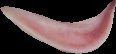

In [32]:
PIL.Image.open(str(moderate[1]))

Mild anemia:

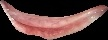

In [33]:
mild  = list(data_dir.glob('Mild Anemia/*'))
PIL.Image.open(str(mild[0]))

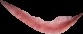

In [34]:
PIL.Image.open(str(mild[1]))

### Create a dataset

In [35]:
batch_size = 32
img_height = 224
img_width = 224

In [36]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3811 files belonging to 4 classes.
Using 3049 files for training.


In [37]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3811 files belonging to 4 classes.
Using 762 files for validation.


In [38]:
class_names = train_ds.class_names
print(class_names)

['Mild Anemia', 'Moderate Anemia', 'No Anemia', 'Severe Anemia']


In [39]:
normalization_layer = layers.Rescaling(1./255)

In [40]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 0.999857


In [ ]:
num_classes = 4

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [44]:
model.compile(optimizer=Adam(learning_rate=0.0001),
               loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [ ]:
model.summary()

### Train the model

In [ ]:
epochs=100
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

## Visualize training results

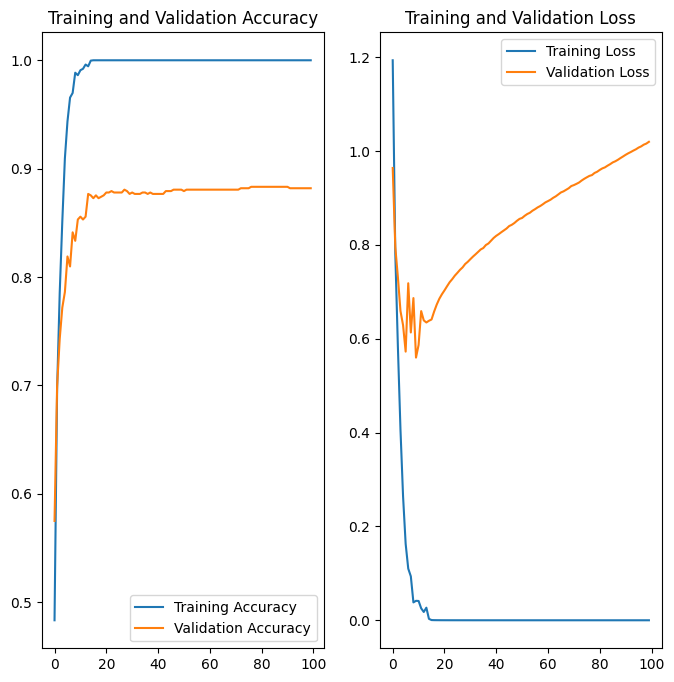

In [19]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
import tensorflow as tf
import numpy as np

# Replace this with the path to your local image
image_path = r"LocalImage_path"  # Update with the path to your image

img = tf.keras.utils.load_img(
    image_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
This image most likely belongs to Mild Anemia with a 100.00 percent confidence.


#drop out

In [21]:
from tensorflow.keras import Sequential, layers

model = Sequential([
  layers.Rescaling(1./255, input_shape=(224, 224, 3)), 
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(4, name="outputs")
])



## Compile and train the model

In [22]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [23]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_2 (Rescaling)         │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 224, 224, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 112, 112, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 112, 112, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 56, 56, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 56, 56, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 50176)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     6,422,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ outputs (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,446,756 (24.59 MB)

 Trainable params: 6,446,756 (24.59 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:
epochs = 100
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 17s 159ms/step - accuracy: 0.3471 - loss: 1.4355 - val_accuracy: 0.4961 - val_loss: 1.1020
Epoch 2/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 15s 155ms/step - accuracy: 0.6105 - loss: 0.9574 - val_accuracy: 0.5906 - val_loss: 0.9327
Epoch 3/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 15s 155ms/step - accuracy: 0.7104 - loss: 0.7313 - val_accuracy: 0.7323 - val_loss: 0.6923
Epoch 4/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 15s 160ms/step - accuracy: 0.8003 - loss: 0.5100 - val_accuracy: 0.7822 - val_loss: 0.6039
Epoch 5/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 16s 171ms/step - accuracy: 0.8655 - loss: 0.3825 - val_accuracy: 0.7861 - val_loss: 0.6037
Epoch 6/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 16s 167ms/step - accuracy: 0.8991 - loss: 0.2712 - val_accuracy: 0.8058 - val_loss: 0.6274
Epoch 7/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 15s 160ms/step - accuracy: 0.9272 - loss: 0.2085 - val_accuracy: 0.8215 - val_loss: 0.5428
Epoch 8/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 15s 160ms/step - accuracy: 0.9612 - loss: 0.1217 - 

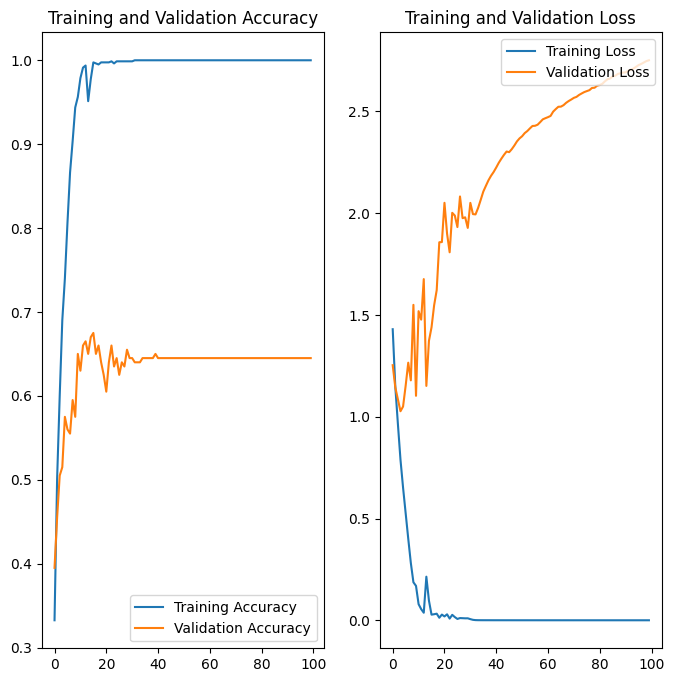

In [28]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Predict on new data

In [ ]:
import tensorflow as tf
import numpy as np

# Replace this with the path to your local image
image_path = r"localImage_path"  # Update with the path to your image

img = tf.keras.utils.load_img(
    image_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
This image most likely belongs to Moderate Anemia with a 58.20 percent confidence.
